## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],num_layer = 3, drp_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    while num_layer > len(num_neurons):
        num_neurons.append(128)    
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def optimizer_type(x,lr):
    if x == 'SGD':
        return keras.optimizers.SGD(lr = lr,nesterov=True,momentum = MOMENTUM)
    elif x == 'RMSprop':
        return keras.optimizers.RMSprop(lr = lr)
    elif x == 'AdaGrad':
        return keras.optimizers.Adagrad(lr = lr)
    else:
        return keras.optimizers.Adam(lr = lr)

In [17]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0,0.2,0.4]
layer_count = [3,5,7]

In [18]:
results = {}

for num_layer in layer_count:
    for drp_ratio in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.2f, %s" % (drp_ratio,str(num_layer)))
        model = build_mlp(input_shape=x_train.shape[1:],num_layer = num_layer,drp_ratio = drp_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "%s_layers-%s" % (str(num_layer),str(drp_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


W0813 14:58:38.731860 10684 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0813 14:58:38.732861 10684 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 14:58:38.758860 10684 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 14:58:38.760860 10684 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 14:58:38.764860 10684 

Experiment with Regulizer = 0.00, 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

W0813 15:03:48.702992 10684 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Experiment with Regulizer = 0.20, 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

50000/50000 [==============================] - 6s 127us/step - loss: 1.4812 - acc: 0.4699 - val_loss: 1.3976 - val_acc: 0.4975
Epoch 48/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4745 - acc: 0.4719 - val_loss: 1.4034 - val_acc: 0.4993
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4682 - acc: 0.4750 - val_loss: 1.3947 - val_acc: 0.5035
Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4592 - acc: 0.4764 - val_loss: 1.3883 - val_acc: 0.5017
Experiment with Regulizer = 0.00, 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)     

50000/50000 [==============================] - 6s 130us/step - loss: 1.4155 - acc: 0.4920 - val_loss: 1.3792 - val_acc: 0.5064
Epoch 36/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4118 - acc: 0.4906 - val_loss: 1.3724 - val_acc: 0.5084
Epoch 37/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4028 - acc: 0.4985 - val_loss: 1.3853 - val_acc: 0.5065
Epoch 38/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.3956 - acc: 0.4994 - val_loss: 1.3687 - val_acc: 0.5113
Epoch 39/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3884 - acc: 0.5028 - val_loss: 1.3712 - val_acc: 0.5137
Epoch 40/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.3812 - acc: 0.5029 - val_loss: 1.3691 - val_acc: 0.5121
Epoch 41/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.3745 - acc: 0.5077 - val_loss: 1.3752 - val_acc: 0.5125
Epoch 42/50
50000/50000 [==============

Epoch 20/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2058 - acc: 0.5701 - val_loss: 1.4735 - val_acc: 0.4846
Epoch 21/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1855 - acc: 0.5791 - val_loss: 1.4210 - val_acc: 0.4989
Epoch 22/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.1641 - acc: 0.5847 - val_loss: 1.4338 - val_acc: 0.4970
Epoch 23/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1481 - acc: 0.5901 - val_loss: 1.3904 - val_acc: 0.5122
Epoch 24/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1313 - acc: 0.5933 - val_loss: 1.4694 - val_acc: 0.4929
Epoch 25/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1140 - acc: 0.6047 - val_loss: 1.4366 - val_acc: 0.5091
Epoch 26/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1018 - acc: 0.6062 - val_loss: 1.4643 - val_acc: 0.4920
Epoch 27/50
50000/50000 [==

Epoch 11/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8635 - acc: 0.3002 - val_loss: 1.7503 - val_acc: 0.3592
Epoch 12/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8364 - acc: 0.3156 - val_loss: 1.7249 - val_acc: 0.3674
Epoch 13/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8124 - acc: 0.3257 - val_loss: 1.7072 - val_acc: 0.3744
Epoch 14/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7912 - acc: 0.3381 - val_loss: 1.6817 - val_acc: 0.3915
Epoch 15/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7708 - acc: 0.3421 - val_loss: 1.6586 - val_acc: 0.3989
Epoch 16/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7542 - acc: 0.3520 - val_loss: 1.6372 - val_acc: 0.4059
Epoch 17/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7315 - acc: 0.3601 - val_loss: 1.6245 - val_acc: 0.4063
Epoch 18/50
50000/50000 [==

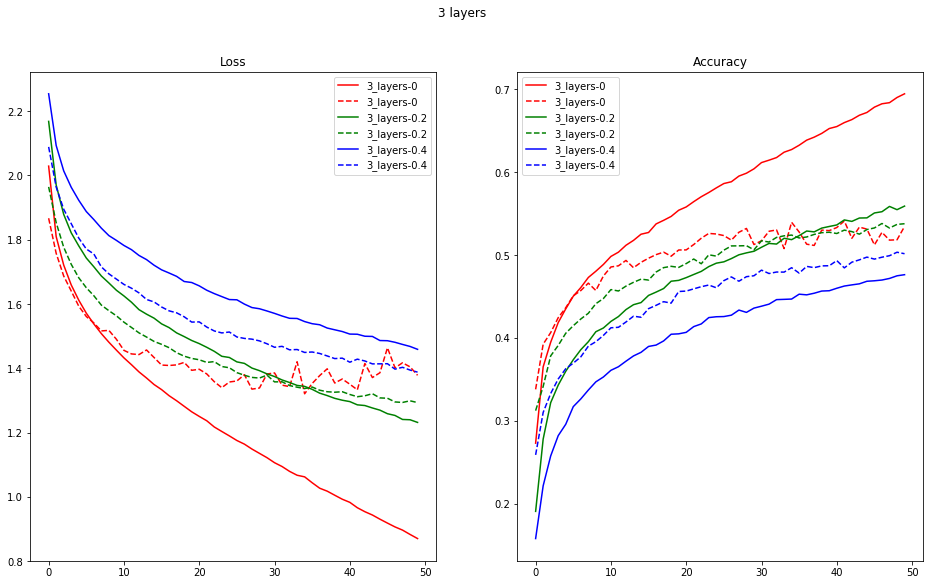

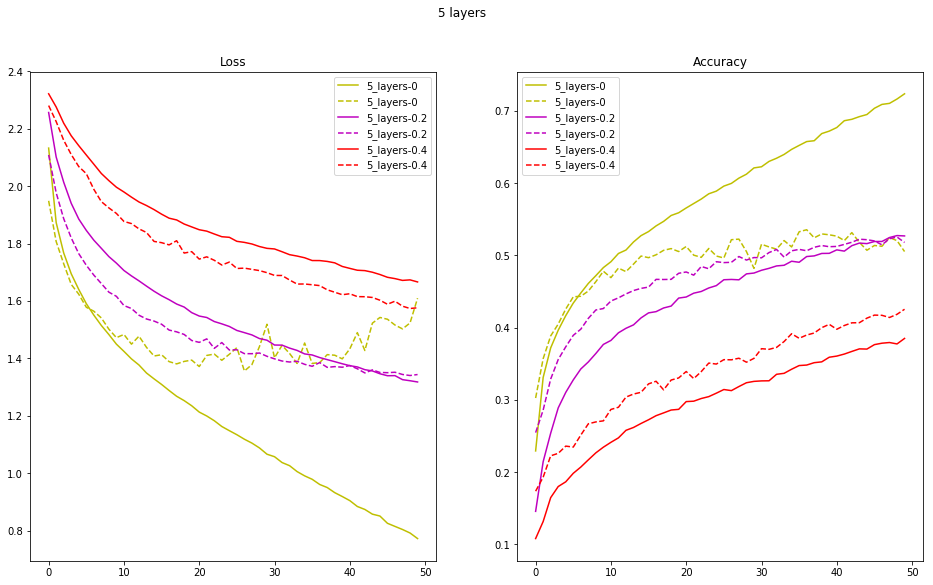

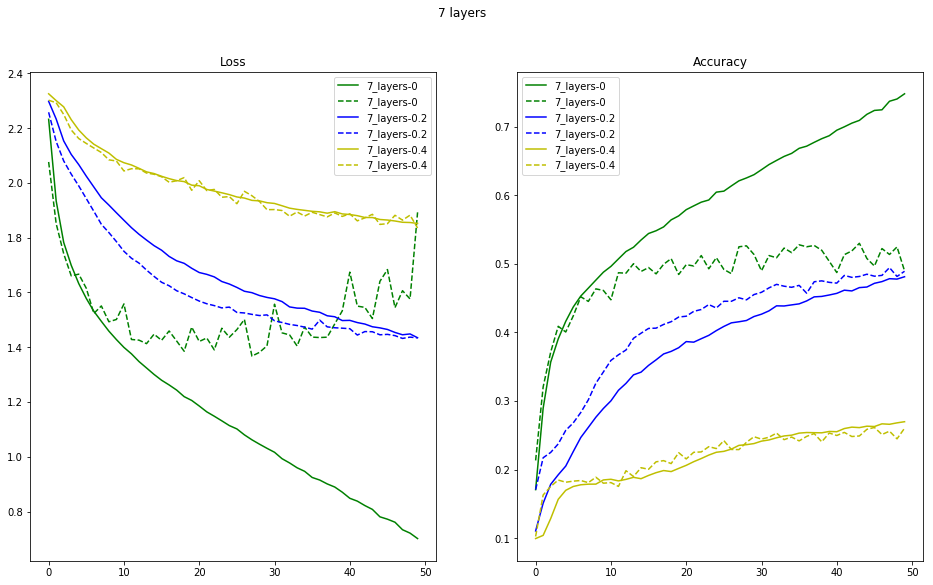

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]


for num_layer in layer_count:
    plt.figure(figsize=(16,9))
    plt.subplot(121).set_title('Loss')
    for i, cond in enumerate(results.keys()):
        if str(num_layer) == cond.split('_layers')[0]:
            k = i % 5
            plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[k])
            plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[k])
    plt.legend(loc = 'best')
    
    plt.subplot(122).set_title('Accuracy')
    for i, cond in enumerate(results.keys()):
        if str(num_layer) == cond.split('_layers')[0]:
            k = i % 5
            plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[k])
            plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[k])
    plt.legend(loc = 'best')
    plt.suptitle(str(num_layer)+' layers')
    plt.show()

In [25]:
#optimizer換成Adam
num_layer = 3
drp_ratio = 0.2

keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:],num_layer = num_layer,drp_ratio = drp_ratio)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

Epoch 42/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5776 - acc: 0.4363 - val_loss: 1.5017 - val_acc: 0.4718
Epoch 43/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5726 - acc: 0.4379 - val_loss: 1.5455 - val_acc: 0.4567
Epoch 44/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5683 - acc: 0.4398 - val_loss: 1.5298 - val_acc: 0.4536
Epoch 45/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5722 - acc: 0.4354 - val_loss: 1.5182 - val_acc: 0.4554
Epoch 46/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5682 - acc: 0.4390 - val_loss: 1.5267 - val_acc: 0.4596
Epoch 47/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5644 - acc: 0.4403 - val_loss: 1.5099 - val_acc: 0.4646
Epoch 48/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5584 - acc: 0.4453 - val_loss: 1.4970 - val_acc: 0.4702
Epoch 49/50
50000/50

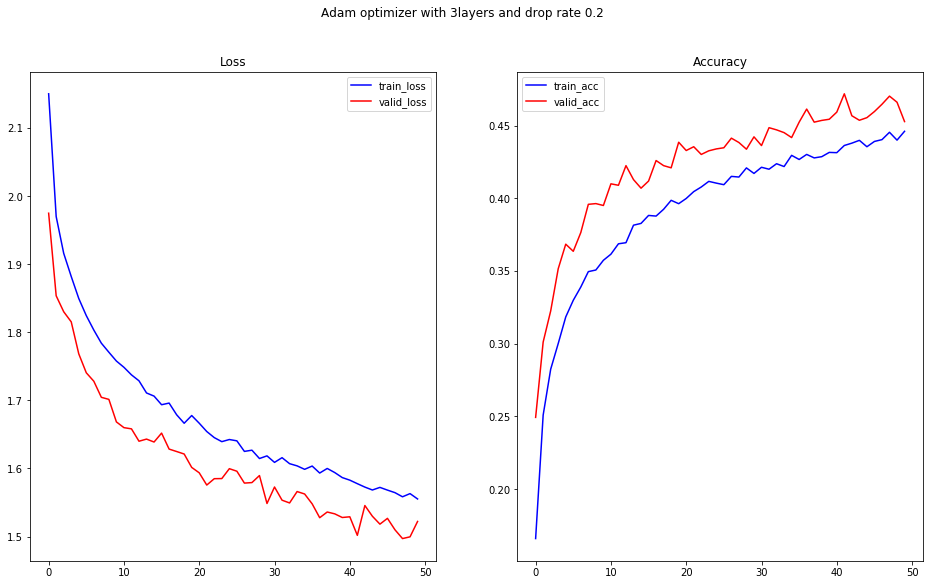

In [27]:
plt.figure(figsize=(16,9))
plt.subplot(121).set_title('Loss')

plt.plot(range(len(train_loss)),train_loss, label='train_loss', color='b')
plt.plot(range(len(valid_loss)),valid_loss, label='valid_loss', color='r')
plt.legend(loc = 'best')

plt.subplot(122).set_title('Accuracy')
plt.plot(range(len(train_acc)),train_acc, label='train_acc', color='b')
plt.plot(range(len(valid_acc)),valid_acc, label='valid_acc', color='r')
plt.legend(loc = 'best')

plt.suptitle('Adam optimizer with ' + str(num_layer) + 'layers and drop rate ' + str(drp_ratio))
plt.show()